# ロジスティックシグモイド関数

## モデル化
$$
p\left( { y = 1 } | { \boldsymbol {\mathrm {x}} } \right) \approx f\left( u \right)\\
p\left( { y = 0 } | { \boldsymbol {\mathrm {x}} } \right) \approx 1 - f\left( u \right)
$$

### 活性化関数 : ロジスティックシグモイド関数
$$
f\left( u \right) = \frac {1}{1 + e^{-u}}\\
u = \boldsymbol {\mathrm {w}}^{T} \boldsymbol {\mathrm {x}} + \boldsymbol {\mathrm {b}}
$$

### 出力層の活性化関数 : ロジスティックシグモイド関数


### 誤差関数 : 負の対数尤度関数
$$
L\left( \boldsymbol {\mathrm {w}} ; \boldsymbol {\mathrm {x}} \right) = \prod _{i=1}^{N}{p\left( { y_{i} } | { \boldsymbol {\mathrm {x}} ; \boldsymbol {\mathrm {w}}} \right)} = \prod _{i=1}^{N}{\left\{ f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right) \right\}^{y_{i}} \left\{ 1 - f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right) \right\}^{1 - y_{i}} }\\
\log {L\left( \boldsymbol {\mathrm {w}} ; \boldsymbol {\mathrm {x}} \right)} = \sum _{i=1}^{N}{\left\{ y_{i} \log {f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right)} + (1 - y_{i}) \log {\left[ 1 - f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right) \right]} \right\}}
$$
上記の対数尤度関数の符号を反転した関数を誤差関数とし、この値の最小化を考える。
$$
E\left( \boldsymbol {\mathrm {w}} \right) = - \sum _{i=1}^{N}{\left\{ y_{i} \log {f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right)} + (1 - y_{i}) \log {\left[ 1 - f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right) \right]} \right\}}
$$
$$
\boldsymbol {\mathrm {w}} = arg \min _{ \boldsymbol {\mathrm {w}} }{E\left( \boldsymbol {\mathrm {w}} \right)}
$$

### 勾配降下法
$$
\nabla E \equiv \frac {\partial E}{\partial \boldsymbol {w}} = \left( \frac {\partial E}{\partial w_{1}}, \dots, \frac {\partial E}{\partial w_{p}} \right)^{T}\\
\boldsymbol {w}^{(t+1)} = \boldsymbol {w}^{(t)} - \epsilon \nabla E
$$

勾配ベクトルの各要素は次式になる。
$$
\frac {\partial E}{\partial w_{j}} = - \sum _{i=1}^{N}{\left[ y_{i} - f\left( \boldsymbol {\mathrm {x}}_{i} ; \boldsymbol {\mathrm {w}} \right) \right] x_{j}}
$$

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

%matplotlib inline

/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 27491 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 35299 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/taiyou/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12464 missing from current font.
  font.

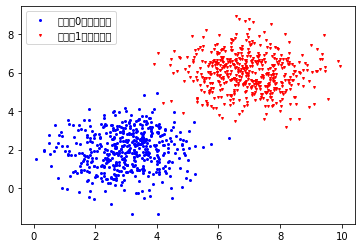

In [4]:
N = 500
x1 = np.random.normal(3, 1, N)
y1 = np.random.normal(2, 1, N)

x2 = np.random.normal(7, 1, N)
y2 = np.random.normal(6, 1, N)

# 特徴量
x = np.append(x1, x2)
y = np.append(y1, y2)

# 教師データ
t = np.asarray([0.0] * len(x1) + [1.0] * len(x2))

plt.plot(x1, y1, 'o', color="blue", markersize=2, label='正解が0のグループ')
plt.plot(x2, y2, 'v', color="red", markersize=2, label='正解が1のグループ')
plt.legend()
plt.show()

## データフローグラフの作成

In [5]:
LEARNING_RATE = 0.1     # 学習率
EPOCHS = 1000                # 学習を繰り返す回数

In [6]:
# データフローグラフ


X1 = tf.placeholder(tf.float32, shape=[None], name="x1")  # x座標を保持する可変長のプレースホルダー
X2 = tf.placeholder(tf.float32, shape=[None], name="x2")  # y座標を保持する可変長のプレースホルダー
T = tf.placeholder(tf.float32, shape=[None], name="y")      # 正解データを保持するプレースホルダー

w = tf.Variable([0., 0., 0.], name="w", trainable=True)         # バイアスと重みを保持するリスト型の変数(初期値0.0)

# シグモイド関数を実行するopノード
model = tf.sigmoid(-(w[0] + w[1]*X1 + w[2]*X2))

# 誤差関数のopノード
cost = -tf.reduce_mean(
    T*tf.log(model + 1e-7) + (1 - T)*tf.log((1 - model))
    )

# ミニマイザー
train_op = tf.train.GradientDescentOptimizer(
    LEARNING_RATE      # 学習率
    ).minimize(cost)   # 最小化問題を解く

init_op = tf.global_variables_initializer()    # 変数を初期化するノード

AttributeError: module 'tensorflow' has no attribute 'placeholder'

In [9]:
# セッションの処理
with tf.Session() as sess:
    sess.run(init_op)                    # initノードを実行して変数を初期化
    prev_err = 0                         # 現在の誤差を保持する変数
    for epoch in range(EPOCHS): # 学習を繰り返す
        epoch += 1

        err, _ = sess.run(
                            [
                                cost,          # 交差エントロピー誤差関数ノード実行
                                train_op    # ミニマイザーを実行
                            ],
                            feed_dict={
                                X1: x, # X1にx_sumをセット
                                X2: y, # X2にy_sumをセット
                                T: t       # Tに正解値tをセット
                            })

        if epoch % 100 == 0:             # 100回ごとに誤差を出力
            print('(', epoch, ')',
                  'err=',err,
                  '[', prev_err - err, ']'
                 )
        if abs(prev_err - err) < 0.0001: # 誤差の差が0.0001以下で終了
            print('(', epoch, ')',
                  'err=',err,
                  '[', prev_err - err, ']'
                 )
            break
        prev_err = err                   # 誤差を更新する

    w_val = sess.run(w,                  # wノードを実行して重みの値を取得
                     feed_dict={
                         X1: x,      # X1にx_sumをセット
                         X2: y,      # X2にy_sumをセット
                         T: t            # Tに正解値tをセット
                     })

( 100 ) err= 0.37905115 [ 0.0013907254 ]
( 200 ) err= 0.27700183 [ 0.0007497668 ]
( 300 ) err= 0.21848036 [ 0.00045736134 ]
( 400 ) err= 0.1812096 [ 0.00030459464 ]
( 500 ) err= 0.15556559 [ 0.00021657348 ]
( 600 ) err= 0.13687617 [ 0.0001617372 ]
( 700 ) err= 0.1226501 [ 0.00012546033 ]
( 800 ) err= 0.11145107 [ 0.00010021776 ]
( 802 ) err= 0.11125126 [ 9.980798e-05 ]


/Users/taiyou/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['[IPAexGothic]'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


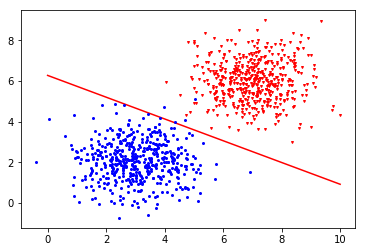

In [10]:
# データと境界線の描画
x_test = np.linspace(0, 10, 20)

plt.plot(x_test,
         -(w_val[0]+w_val[1]*x_test)/w_val[2],
         color='red')
# 正解が0のデータをプロット
plt.plot(x1, y1, 'o',  color='blue', markersize=2)
# 正解が1のデータをプロット
plt.plot(x2, y2, 'v',  color='red',markersize=2)
plt.show()